# Haar Cascades in OpenCV2

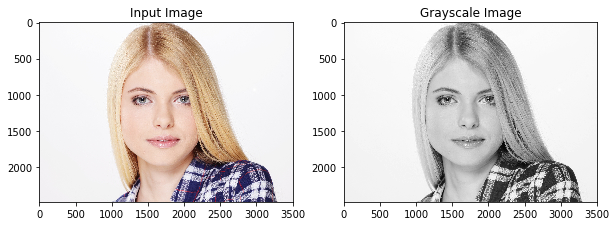

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

image = cv2.imread('images/face-pexels.jpg')

image_copy = np.copy(image)
image_copy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))
ax1.set_title('Input Image')
ax1.imshow(image_copy)
ax2.set_title('Grayscale Image')
ax2.imshow(gray, cmap='gray')

In [41]:
import urllib.request
import os

# Haar Cascade XML files are included with OpenCV install in the opencv/data/haarcascades/ folder
# Here I'm downloading from the OpenCV Github repo to make this notebook more portable

cascade_filepath = 'data/haarcascade_frontalface_default.xml'
if not os.path.isfile(cascade_filepath):
    response = urllib.request.urlopen('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml')
    with open(cascade_filepath, 'wb') as f:
        f.write(response.read())
        
face_cascade = cv2.CascadeClassifier(cascade_filepath)

# Detect the faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

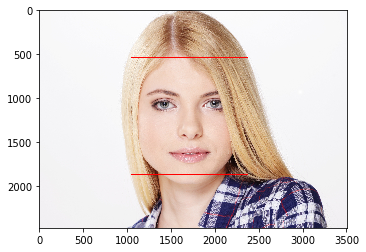

In [42]:
for (x,y,w,h) in faces:
    cv2.rectangle(image_copy,(x,y),(x+w,y+h),(255,0,0),2)
    
plt.imshow(image_copy)